Reconsider the household expenditure model that appears in the text, and the data for which are in the file $food.dat$. That is, we have the model
$$ y_i = \beta_1 + \beta_2 x_i + e_i$$

where $y_i$ is food expenditure for the $i$th household and $x_i$ is income. . Find generalized least squares estimates for $\beta_1$ and $\beta_2$ under the assumptions 
- $\text{var}(e_i) = \sigma^2 \sqrt{x_i}$
- $\text{var}(e_i) = \sigma^2 x^2_i$
- $\text{var}(e_i) = \sigma^2 \ln(x_i)$


Comment on the sensitivity of the estimates and their standard errors to the heteroskedastic specification. For each case, use the White $N \times R^2$ statistic and the residuals from the transformed model to test whether heteroskedasticity has been eliminated.


$$ \text{var}(e_i) = \sigma_i^2 = \sigma^2\sqrt{x_i} = \exp\big( a_0 + \alpha_1 \ln(x_i) \big), \quad \text{where} \quad   a_0 = \ln(\sigma^2) \iff  e^{a_0} = \sigma^2 \quad \text{and} \quad \alpha_1 = 1/2 \iff e^{\alpha_1 \ln(x_i)} = e^{\ln(x_i^{1/2})} = \sqrt{x_i}$$
$$ \text{var}(e_i) = \sigma_i^2 = \sigma^2  x_i^{2} = \exp\big(a_0 + \alpha_1 \ln(x_i) \big), \quad \text{where} \quad  a_0 = \ln(\sigma^2) \iff e^{a_0} = \sigma^2  \quad \text{and} \quad \alpha_1 = 2 \iff e^{\alpha_1 \ln(x_i)} = e^{\ln{x_i^2}} = x_i^{2} $$
$$ \text{var}(e_i) = \sigma_i^2 = \sigma^2  \ln(x_i) = \exp\bigg(  a_0 + \alpha_1 \ln\big(\ln(x_i)\big) \bigg), \quad \text{where} \quad a_0 = \ln(\sigma^2) \iff  e^{a_0}  = \sigma^2 \quad \text{and} \quad \alpha_1 =  1 \iff  e^{\alpha_1 \ln( \ln(x_i) )} = e^{\ln ( \ln (x_i))} = \ln(x_i)$$

In [3]:
clear all

use https://www.stata.com/data/s4poe4/food.dta

qui reg food_exp income

gen logincome = log(income)
gen loglogincome = log(logincome)


hetregress food_exp income, het(logincome)








Fitting full model:

Iteration 0:   log likelihood =   -227.889  
Iteration 1:   log likelihood = -226.61039  
Iteration 2:   log likelihood = -225.72188  
Iteration 3:   log likelihood = -225.71519  
Iteration 4:   log likelihood = -225.71519  

Heteroskedastic linear regression               Number of obs     =         40
ML estimation
                                                Wald chi2(1)      =     135.11
Log likelihood = -225.7152                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
    food_exp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
food_exp     |
      income |   10.63444   .9148876    11.62   0.000     8.841294    12.42759
       _cons |   76.07294   7.369143    10.32   0.000     61.62969     90.5162
-------------+----------------------------------------------------------------
lnsig

In [7]:
nlcom(sigma2: exp(2))


      sigma2:  exp(2)

------------------------------------------------------------------------------
    food_exp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      sigma2 |   7.389056          .        .       .            .           .
------------------------------------------------------------------------------


In [2]:
constraint logincome = 1

invalid syntax


r(198);


In [21]:
clear all

use https://www.stata.com/data/s4poe4/food.dta

reg food_exp income
hetreg food_exp income, het(income) vce(robust)

// rvpplot income, yline(0)





      Source |       SS           df       MS      Number of obs   =        40
-------------+----------------------------------   F(1, 38)        =     23.79
       Model |  190626.984         1  190626.984   Prob > F        =    0.0000
    Residual |  304505.176        38   8013.2941   R-squared       =    0.3850
-------------+----------------------------------   Adj R-squared   =    0.3688
       Total |   495132.16        39  12695.6964   Root MSE        =    89.517

------------------------------------------------------------------------------
    food_exp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      income |   10.20964   2.093264     4.88   0.000     5.972052    14.44723
       _cons |     83.416   43.41016     1.92   0.062    -4.463279    171.2953
------------------------------------------------------------------------------


Fitting full model:

Iteration 0:   log pseud

In [19]:
gen y_i = food_exp/(income)^(-4)
gen xi1 = 1/(income)^(-4)
gen xi2 = income/(income)^(-4)

reg y_i xi1 xi2 

predict residuals, resid






      Source |       SS           df       MS      Number of obs   =        40
-------------+----------------------------------   F(2, 37)        =    132.00
       Model |  3.9759e+17         2  1.9880e+17   Prob > F        =    0.0000
    Residual |  5.5721e+16        37  1.5060e+15   R-squared       =    0.8771
-------------+----------------------------------   Adj R-squared   =    0.8704
       Total |  4.5331e+17        39  1.1623e+16   Root MSE        =    3.9e+07

------------------------------------------------------------------------------
         y_i |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         xi1 |   293.2252   195.3804     1.50   0.142    -102.6532    689.1035
         xi2 |   3.355089   6.176534     0.54   0.590    -9.159758    15.86994
       _cons |   -8702442   1.25e+07    -0.70   0.491    -3.40e+07    1.66e+07
---------------------------------------------

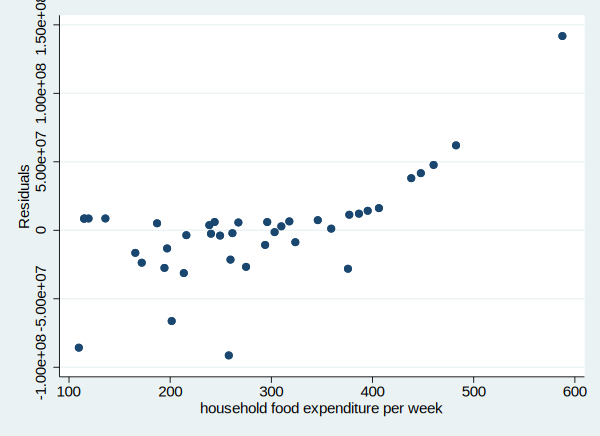

In [12]:
scatter residuals food_exp

In [2]:
gen double logincome = ln(income)
hetregress food_exp income, het(logincome)




Fitting full model:

Iteration 0:   log likelihood =   -227.889  
Iteration 1:   log likelihood = -226.61039  
Iteration 2:   log likelihood = -225.72188  
Iteration 3:   log likelihood = -225.71519  
Iteration 4:   log likelihood = -225.71518  

Heteroskedastic linear regression               Number of obs     =         40
ML estimation
                                                Wald chi2(1)      =     135.11
Log likelihood = -225.7152                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
    food_exp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
food_exp     |
      income |   10.63444   .9148875    11.62   0.000     8.841295    12.42759
       _cons |   76.07294   7.369143    10.32   0.000     61.62969     90.5162
-------------+----------------------------------------------------------------
lnsigma2 

In [3]:
nlcom (sigma2: exp(_b[lnsigma2:_cons]))

nlcom (sigma2: exp(2))




      sigma2:  exp(_b[lnsigma2:_cons])

------------------------------------------------------------------------------
    food_exp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      sigma2 |   1.597444   2.093191     0.76   0.445    -2.505134    5.700022
------------------------------------------------------------------------------


      sigma2:  exp(2)

------------------------------------------------------------------------------
    food_exp |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      sigma2 |   7.389056          .        .       .            .           .
------------------------------------------------------------------------------


The file br2.dat contains data on 1080 houses sold in Baton Rouge, Louisiana during mid-2005. We will be concerned with the selling price (PRICE), the size of the house in square feet (SQFT ), and the age of the house in years (AGE). Define a new variable that measures house size in terms of hundreds of square feet, SQFT100 1⁄4 SQFT=100.

(a) Find least squares estimates of the following equation and save the residuals:

$$ \ln(PRICE) = \beta_1 + \beta_2 SQFT100 + \beta_3 AGE + \beta_4 AGE^2 + e$$


In [8]:
clear all

use https://www.stata.com/data/s4poe4/br2.dta

gen log_price = log(price)
gen age2 = age^2
gen sqft100 = sqft/100

reg log_price sqft100 age age2

predict residuals, resid








      Source |       SS           df       MS      Number of obs   =     1,080
-------------+----------------------------------   F(3, 1076)      =    865.49
       Model |  209.891557         3  69.9638522   Prob > F        =    0.0000
    Residual |  86.9808097     1,076  .080837184   R-squared       =    0.7070
-------------+----------------------------------   Adj R-squared   =    0.7062
       Total |  296.872366     1,079  .275136577   Root MSE        =    .28432

------------------------------------------------------------------------------
   log_price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     sqft100 |   .0387624   .0008693    44.59   0.000     .0370566    .0404682
         age |  -.0175549   .0013565   -12.94   0.000    -.0202165   -.0148932
        age2 |   .0001734   .0000227     7.65   0.000     .0001289    .0002178
       _cons |   11.11959   .0274129   405.6

(b) Plot the residuals against (i) $AGE$ and (ii) $SQFT100$. Is there any evidence of heteroskedasticity?

In [ ]:
scatter residuals age
scatter residuals sqft100

$AGE$ doesn't seem to be a problem. There is some pattern of heteroskedasticity in $SQFT100$

Test for heteroskedasticity using a Breusch-Pagan test and the variables $AGE$ and $SQFT100$. Is there evidence of heteroskedasticity at a $1\%$ level of significance?

In [ ]:
qui reg log_price sqft100 age 
hettest

Yes, there is evidence of heteroskedasticity

(d) Estimate the variance funtion $\sigma^2_i = \exp(\alpha_1 + \alpha_2AGE_i + \alpha_3 SQFT100_i)$ and report the results. Use the robust standard error option and comment on the effects of $AGE$ and $SQFT100$ on the variance. 


In [ ]:
hetregress log_price sqft100 age age2, het(age sqft100) vce(robust)

(e) Use the estimated variance function in (d) to find variance estimates $\hat{\sigma}^2_i, i = 1, 2, \cdots, 1080,$ and use those estimates to find generalized least squares estimates of the equation in (a).

(f) Use a table format to report estimates and standard errors for the model in part (a), from the following estimation techniques. Comment on any differences and similarities. 
- (i) Least squares
- (ii) Least squares with heteroskedasticity-robust standard errors
- (iii) Generalized least squares from part (e)
- (iv) Generalized least sqaures from part (e), but with robust standard errors

(g) Do the transformed residuals from the transformed regression in part (e) show evidence of heteroskedasticirty? Use a Breusch-Pagan test with variables $AGE$ and $SQFT100$